In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [3]:
df = pd.read_csv("F:/project/customer_segmentation/Mall_Customers.csv")
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


 K-mean usually suitable for numerical features, hard for categorical features, so i'm gonna take annual income, spending score to use k-mean (gender, id, and age just doesn't important at all)

In [5]:
X = df.iloc[:, 3:5]
X.shape

(200, 2)

In [9]:
X = X.rename(columns={'Annual Income (k$)':'Income', 'Spending Score (1-100)':'Spending'})
X

,Income,Spending
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40
...,...,...
195,120,79
196,126,28
197,126,74
198,137,18


Text(0, 0.5, 'Spending')

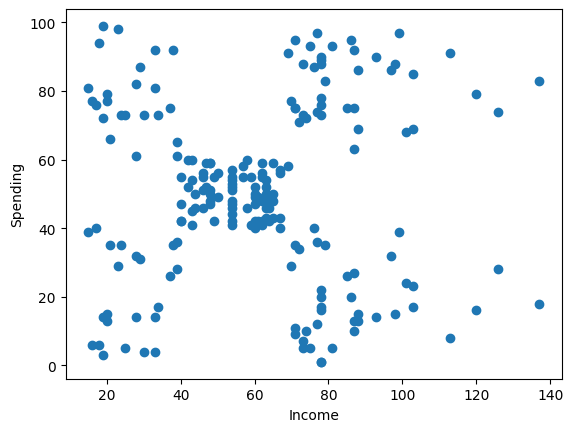

In [12]:
plt.scatter(X['Income'], X['Spending'])
plt.xlabel('Income')
plt.ylabel('Spending')

In [13]:
X.isnull().sum()

Income      0
Spending    0
dtype: int64

In [14]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Index: 200 entries, 0 to 199
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype
---  ------    --------------  -----
 0   Income    200 non-null    int64
 1   Spending  200 non-null    int64
dtypes: int64(2)
memory usage: 4.7 KB


i will pick num_clusters = 5 based on the scatter plot

In [15]:
from sklearn.cluster import KMeans

In [17]:
kmean = KMeans(n_clusters = 5, random_state = 42)

y = kmean.fit_predict(X)
y

array([4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2,
       4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 0,
       4, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 3, 1, 0, 1, 3, 1, 3, 1,
       0, 1, 3, 1, 3, 1, 3, 1, 3, 1, 0, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1,
       3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1,
       3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1,
       3, 1], dtype=int32)

Text(0, 0.5, 'Spending')

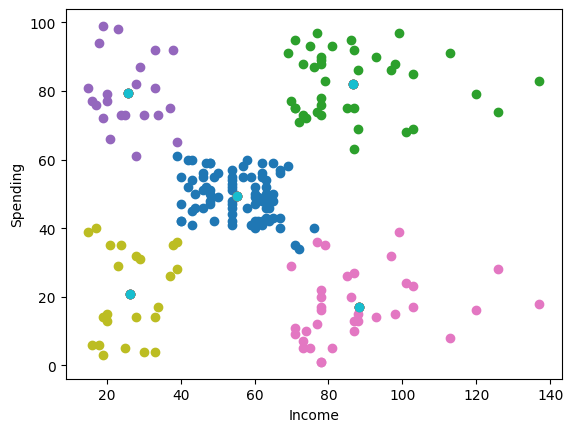

In [30]:
#visualizing
for i in range(5):
    plt.scatter(X[y==i]['Income'], X[y==i]['Spending'])
    plt.scatter(kmean.cluster_centers_[:,0], kmean.cluster_centers_[:,1])
plt.xlabel("Income")
plt.ylabel("Spending")